In [1]:
# lINK : https://github.com/gallmerci/bico/blob/master/examples/applications.ipynb
# FIRST WE NEED TO ADD THIS LIBRARY INTO OUT PYTHON LIBRARY. CHECK THE CODE AND ADD IN THE PROPER LOCATION. 

from sklearn.cluster import KMeans
import numpy as np


# Generate random data
X = np.random.rand(100, 2)

# Create an instance of KMeans with 3 clusters
kmeans = KMeans(n_clusters=3)

# Fit the data to the KMeans model
kmeans.fit(X)

# Get the labels assigned to each data point
labels = kmeans.labels_

# Get the coordinates of the cluster centers
centers = kmeans.cluster_centers_

# Print the labels and coordinates of the cluster centers
print(labels)
print(centers)


C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[0 0 2 1 0 0 1 0 2 0 0 1 0 0 1 0 0 2 1 2 1 1 2 1 0 0 1 2 2 0 0 1 0 2 0 0 1
 2 2 2 1 1 0 2 2 2 2 0 0 0 2 2 1 0 1 2 0 2 0 1 0 2 1 0 0 1 1 1 1 2 2 2 1 2
 0 1 0 2 2 2 0 1 0 1 0 1 0 2 2 1 2 0 0 2 1 0 0 2 2 0]
[[0.17150583 0.51313529]
 [0.65851667 0.16643597]
 [0.73084963 0.7031666 ]]


In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from bico.core import BICO
from bico.geometry.point import Point   



In [27]:

n_samples = 1000
random_state = 10 

X_varied, y_varied = make_blobs(n_samples=n_samples, centers=5,
                                cluster_std=[1.0, 3, 0.3, 2, 5],
                                random_state=random_state)

kmeans = KMeans(n_clusters=5, random_state=random_state).fit(X_varied)
cluster_centers = kmeans.cluster_centers_
cost = kmeans.inertia_
cluster_mapping = kmeans.predict(X_varied)

print("Cost of clustering:", cost)
print("Cluster centroids:\n", cluster_centers)
print("Mapping of data points to their corresponding cluster centroid:\n", cluster_mapping)



# Calculate the distances between each point in `X_new` and the cluster centers
distances = np.linalg.norm(X_varied[:, np.newaxis, :] - cluster_centers, axis=2)

# Calculate the sum of squared distances for each point in `X_new`
cost_new = np.sum(np.min(distances, axis=1) ** 2)

print("Cost of clustering for new data:", cost_new)


y_pred = KMeans(n_clusters=5, random_state=random_state).fit_predict(X_varied)
type(X_varied)

Cost of clustering: 11018.668514284935
Cluster centroids:
 [[  2.93978412   5.09676868]
 [ -0.58896925  -5.62010301]
 [ -5.97300026   4.8507484 ]
 [  5.29033339  -9.86621917]
 [ -9.64375573 -10.25020327]]
Mapping of data points to their corresponding cluster centroid:
 [3 4 2 3 2 1 1 1 3 4 1 3 1 0 4 1 4 4 3 1 0 1 1 2 4 1 2 1 3 0 3 3 2 0 3 3 4
 4 1 1 4 1 1 2 1 2 0 4 2 2 3 2 3 2 1 3 4 4 3 2 0 1 1 4 4 2 3 2 0 2 3 0 1 1
 0 0 1 2 4 2 3 3 3 3 2 2 2 1 0 1 1 1 3 3 3 4 3 3 0 3 4 3 4 3 0 2 2 2 1 3 0
 2 2 2 1 2 2 2 1 3 0 1 1 1 1 4 2 0 3 2 1 2 2 1 0 0 4 1 4 2 2 2 2 4 0 4 2 3
 0 0 2 1 2 4 4 2 1 2 1 1 0 4 1 1 0 1 3 2 1 4 1 1 2 3 0 1 2 4 2 3 1 2 2 3 3
 1 1 3 0 3 1 4 4 1 3 1 4 1 3 3 1 3 1 2 0 4 1 3 2 4 3 3 1 1 2 2 2 2 0 1 2 1
 3 3 1 2 2 1 2 3 3 2 0 1 2 3 4 1 3 0 1 3 4 1 3 1 0 4 4 1 0 1 3 0 1 2 1 3 2
 2 1 1 0 0 0 0 2 4 3 1 3 2 3 3 2 2 3 3 3 0 0 2 0 3 0 0 1 2 0 0 3 0 2 2 2 2
 2 0 2 2 3 3 1 2 3 2 3 3 3 2 2 3 1 0 3 2 3 3 1 2 3 1 1 2 1 2 0 4 0 4 4 0 2
 1 2 0 0 3 0 3 3 4 3 0 4 1 1 3 1 2 4 3 1 3 3 0 4 1 1 1 

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


numpy.ndarray

In [28]:
projections = 5


def run_bico(size):
    bico = BICO(2, projections, size)
    
    for row in X_varied:
        bico.insert_point(Point(row))
        
    c = bico.get_coreset()
    plt.subplot(131)                        #1*3 and put this graph at position 1. 
    plt.scatter(c[:,1], c[:,2], s=c[:,0])
    plt.title("Reduced data set of size {0}".format(size))

    

    
    # repeat rows as a workaround for missing weighted kmeans implementation
    X_red = []

    for row in c:
        ar = np.tile(row[1:], (int(row[0]),1))   # creates new instance of each row[1:] row[0] times. #first coordinate = w(p)
        X_red.append(ar)
    X_red = np.vstack(X_red)
    
    # cluster on reduced data set
    kmeans = KMeans(n_clusters=5, random_state=random_state).fit(X_red)
    cluster_centers = kmeans.cluster_centers_
    cost = kmeans.inertia_
    centers = kmeans.predict(X_red)
    
    y_pred_red = kmeans.predict(X_varied)
    distances = np.linalg.norm(X_varied[:, np.newaxis, :] - cluster_centers, axis=2)
    cost_new = np.sum(np.min(distances, axis=1) ** 2)
    
    print(len(c),len(X_red))
#     print("Cost of clustering for new data:", cost_new)
    
#     print( max(y_pred_red) , kmeans)
#     print("Cost of clustering:", cost)
#     print("Cluster centroids:\n", centers)
#     print("Mapping of data points to their corresponding cluster centroid:\n", cluster_mapping)

    
    plt.subplot(132)
    plt.scatter(X_varied[:, 0], X_varied[:, 1], alpha=0.2, c='blue')
    plt.title("Clustering on reduced data set")
    
    plt.subplot(133)
    plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
    plt.title("Clustering on original data set")
    plt.show() 

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


45 1000


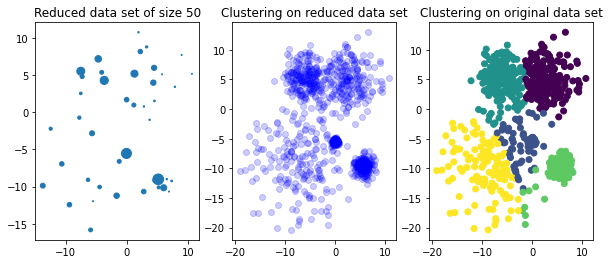

In [29]:
%matplotlib inline
plt.rcParams["figure.figsize"] = [10, 4]

for size in [50]:
    run_bico(size)  



In [6]:
from collections import deque
from math import sqrt

import logging
import numpy as np
from bico.geometry.point import Point
from bico.nearest_neighbor.base import NearestNeighbor
from bico.nearest_neighbor.random_binary_projections import RandomBinaryNN
from bico.nearest_neighbor.random_binary_tree import RandomBinaryTreeNN
from bico.nearest_neighbor.simple_projection import SimpleProjection
from bico.utils.BICONode import BICONode
from bico.utils.ClusteringFeature import ClusteringFeature
from datetime import datetime
projections = 5
def run_bico(X,size):
    bico = BICO(2, projections, size)
    
    for row in X:
        bico.insert_point(Point(row))
        
    c = bico.get_coreset()
    
    X_tile= []

    for row in c:
        ar = np.tile(row[1:], (int(row[0]),1))   # creates new instance of each row[1:] row[0] times. #first coordinate = w(p)
        X_tile.append(ar)
    X_tile = np.vstack(X_tile)
    mapping = get_mapping(bico)
    return c, X_tile , mapping



def get_mapping(self) -> dict:
    """
    Returns a dictionary mapping the original points to their coreset points.
    """
    mapping = {}
    queue = deque()
    queue.append(self.root)
    while len(queue) > 0:
        node = queue.popleft()
        if node.is_leaf():
            for cf in node.cfs:
                for point in cf.points:
                    mapping[point] = cf.center
        else:
            for child in node.children:
                queue.append(child)
    return mapping


In [7]:
run_bico(X_varied , 10)

AttributeError: 'BICONode' object has no attribute 'is_leaf'